
# Project Final Report


# 0. Background information

Minecraft is a video game played by a wide range of people. PLAI, a computer science research group at UBC, aims to collect data about the ways in which individuals play Minecraft by recording their in-game actions. This report seeks to assist PLAI with their recruitment efforts in order to ensure it is optimally targeted. Thus, PLAI has provided us with a dataset collected through an online survey, which contains the name, experience, email, playtime, gender, and age of players. Starting from a broad initial question, we conducted exploratory analysis to narrow it to a specific research question that we hope will yield insightful results that can help PLAI optimally recruit players for their research.

# 1. Data Description

## 1.1 Dataset Overview
In this project, we will be working with the file **players.csv**, which contains one row per unique player and several demographic and gameplay-related features.

- **Number of observations:** 196
- **Number of variables:** 7

## 1.2 Variable Summary Table

| Variable       | Type      | Description | Missing | Unique Values |
|----------------|-----------|-------------|---------|---------------|
| experience     | categorical | Player’s self-reported gaming experience | 0 | 5 |
| subscribe      | boolean | Whether the player subscribed to the newsletter | 0 | 2 |
| hashedEmail    | identifier | Unique hashed player ID | 0 | 196 |
| played_hours   | numeric | Total hours played on the server | 0 | 43 |
| name           | text | Player name | 0 | 196 |
| gender         | categorical | Gender identity | 0 | 7 |
| Age            | numeric | Player age in years | 2 | 32 |


## 1.3 Numeric Summary Statistics

| Variable     |Count | Mean | Std Dev | Min | Median | Max |
|--------------|------|----------|------|--------|------|----|
| played_hours |  196   |    5.85      |    28.36  |   0.00     |  0.10    |  223.1  |
| Age          |  194    |   21.14       |   7.39   |   9.00     |   19.00   |  58  |

## 1.4 Notes and Potential Data Issues
- Age contains 2 missing values.  
- `played_hours` is heavily skewed with a few large outliers. Many players have close to 0 or very small play time.  
- There may be volunteer/self-selection bias in the dataset.  
- `name` contains personal information and should be excluded from all analysis.
- Subscription classes are imbalanced (about 73% subscribed).
- Experience appears to be ordinal and we should preserve this




## 1.5 Overall summary

The **players.csv** file contains 196 unique players and 7 variables. Key numeric variables are **played_hours** (total play time per player) and **Age** (two missing values). **Subscribe** is a boolean indicating newsletter signup (144 True, 52 False). Categorical variables include **experience** (5 levels) and **gender** (7 categories). Computer checks found no duplicate **hashedEmail** identifiers. **played_hours** is highly skewed (mean 5.85 hours, median 0.10 hours, max 223.1). Potential limitations include class imbalance for **subscribe**, small counts in some **gender** categories, and volunteer bias inherent to the data collection method.

# 2. Questions

## 2.1 Broad Question
**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

## 2.2 Specific Question
**Can player demographic attributes (`Age`, `gender`) and gameplay characteristics (`experience`, `played_hours`) predict whether a player subscribes to the game-related newsletter?**

This question is appropriate because `players.csv` contains all required explanatory variables and a clear binary response variable (`subscribe`). This will be a standard classification problem. To apply models seen in class, we will likely need to scale the numeric variables, impute the missing values in the age variable, and encode the categorical variables to numeric form.

# 3. Exploratory Data Analysis (EDA)
## 3.1 Load Data

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
url <- "https://raw.githubusercontent.com/yuguogm/dsci_100_final_project/refs/heads/main/players%20(1).csv"
players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## 3.2 Basic Data Wrangling

In [3]:
library(tidyverse)

players_tidy <- players |>
  mutate(
    subscribe = as.logical(subscribe),
    gender = as.factor(gender),
    experience = as.factor(experience)
  )

head(players_tidy)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Note: We did not change name to factor as that will likely be dropped


## 3.3 Mean and Summary statistics of Quantitative Variables

In [4]:
players_tidy |>
  summarize(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    median_played_hours = median(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    median_age = median(Age, na.rm = TRUE)
  )

mean_played_hours,median_played_hours,mean_age,median_age
<dbl>,<dbl>,<dbl>,<dbl>
5.845918,0.1,21.13918,19


In [5]:
summary_players <- summary (players)
summary_players

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

## 3.4 Exploratory Visualizations


## Class Imbalance Visulaizations



### Class Imbalance for Subscribe


Figure 1.1 shows a class imbalance for subscribed vs not subscribed. Subscribed has 144 and not subscribed has 52 data points.

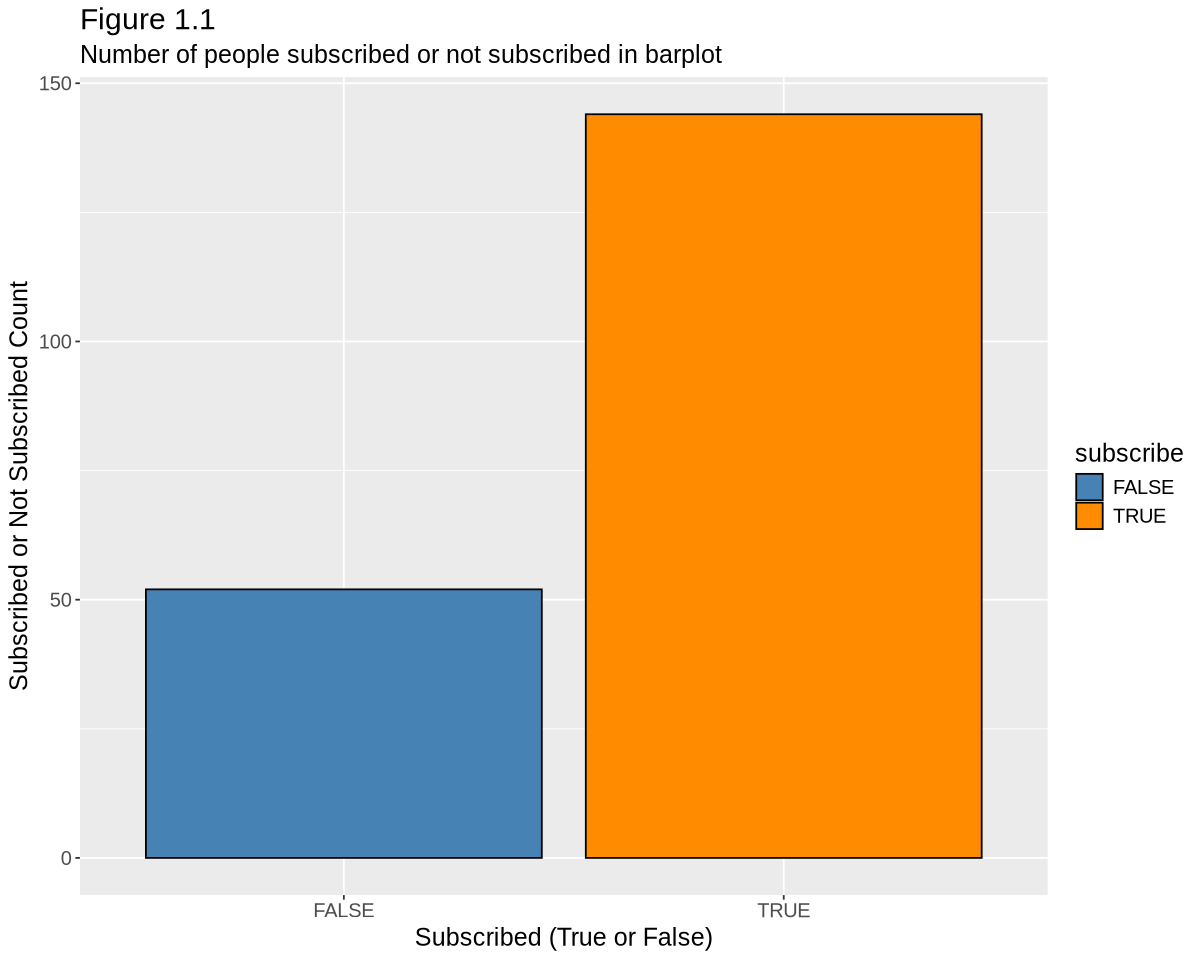

In [6]:
#Creating a graph for number of subscribed vs not subscribed
subscribe_graph <- players_tidy |>
    ggplot (aes (x= subscribe, fill = subscribe)) +
    geom_bar (color = "black") +
    xlab ("Subscribed (True or False)") +
    ylab ("Subscribed or Not Subscribed Count") +
    ggtitle ("Figure 1.1") +
    labs (subtitle = "Number of people subscribed or not subscribed in barplot") +
    scale_fill_manual(values = c("steelblue", "darkorange")) +
    theme (text = element_text (size = 15)) 
    options (repr.plot.width = 10, repr.plot.height = 8)
subscribe_graph

Figure 1.2 shows the number of players playing minecraft for each gender. Male has the most amount of players and then it is female. All other catergories have a lot less players demonstrating that there is a inbalance (Figure 1.2).

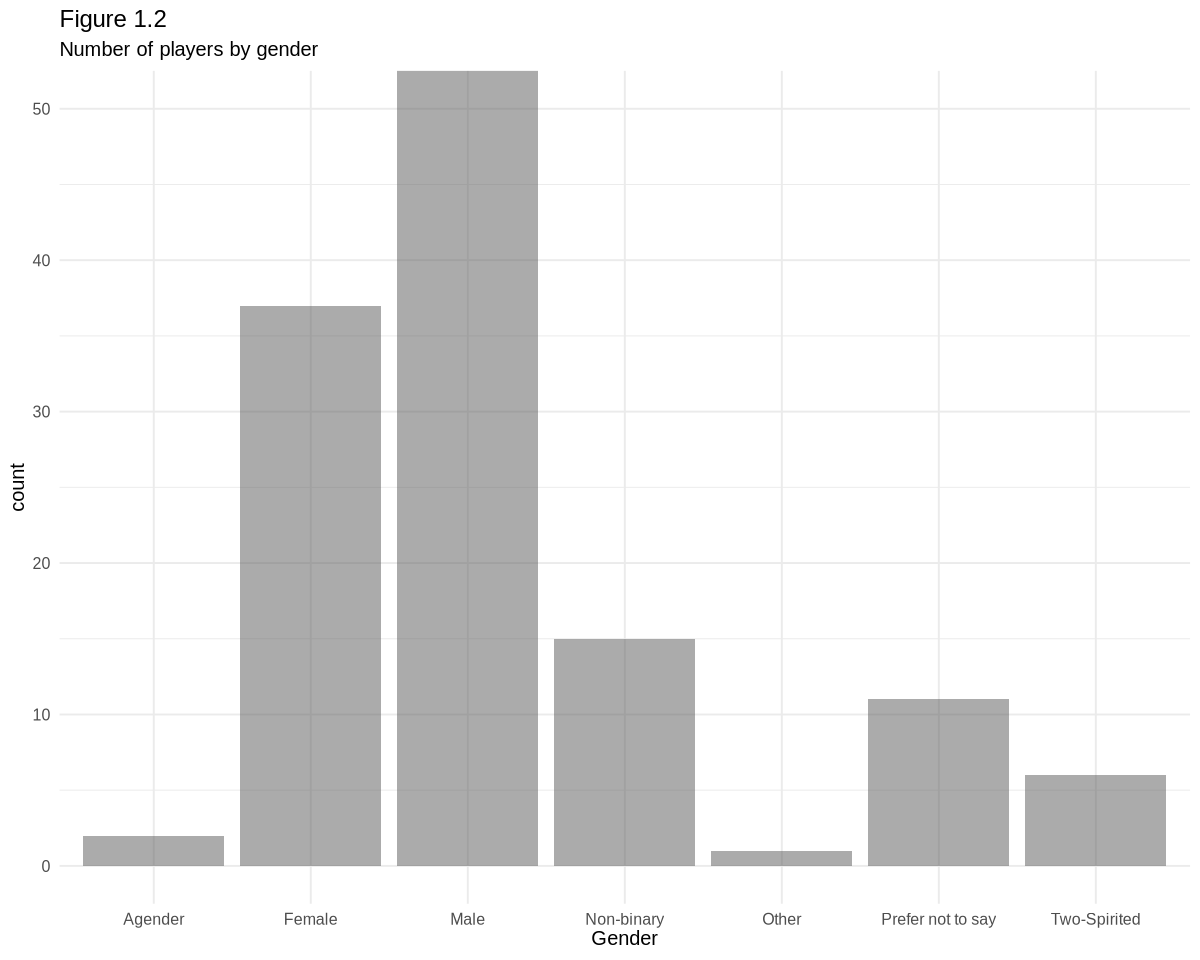

In [7]:
ggplot(players_tidy, aes(x = gender)) +
  geom_bar(alpha = 0.5, position = "identity") +
  coord_cartesian(ylim = c(0, 50)) +
  labs(
    title = "Figure 1.2",
    x = "Gender",
    subtitle = "Number of players by gender"
  ) +
  theme_minimal(base_size = 12)

For figure 1.3 there is the most players playing for around 0 hour point. After that for subscribed and not subscribed the number of players playing is a lot less (Figure 1.3). The subscribed players catergory seems to have some players still playing after the 0 hour mark and even has some players playing for over 200 hours. For not subscribed category the players do not play for longer than around the 0 hours mark (Figure 1.3). This indicates that the subscribed players are playing minecraft a lot more that the not subscribed.

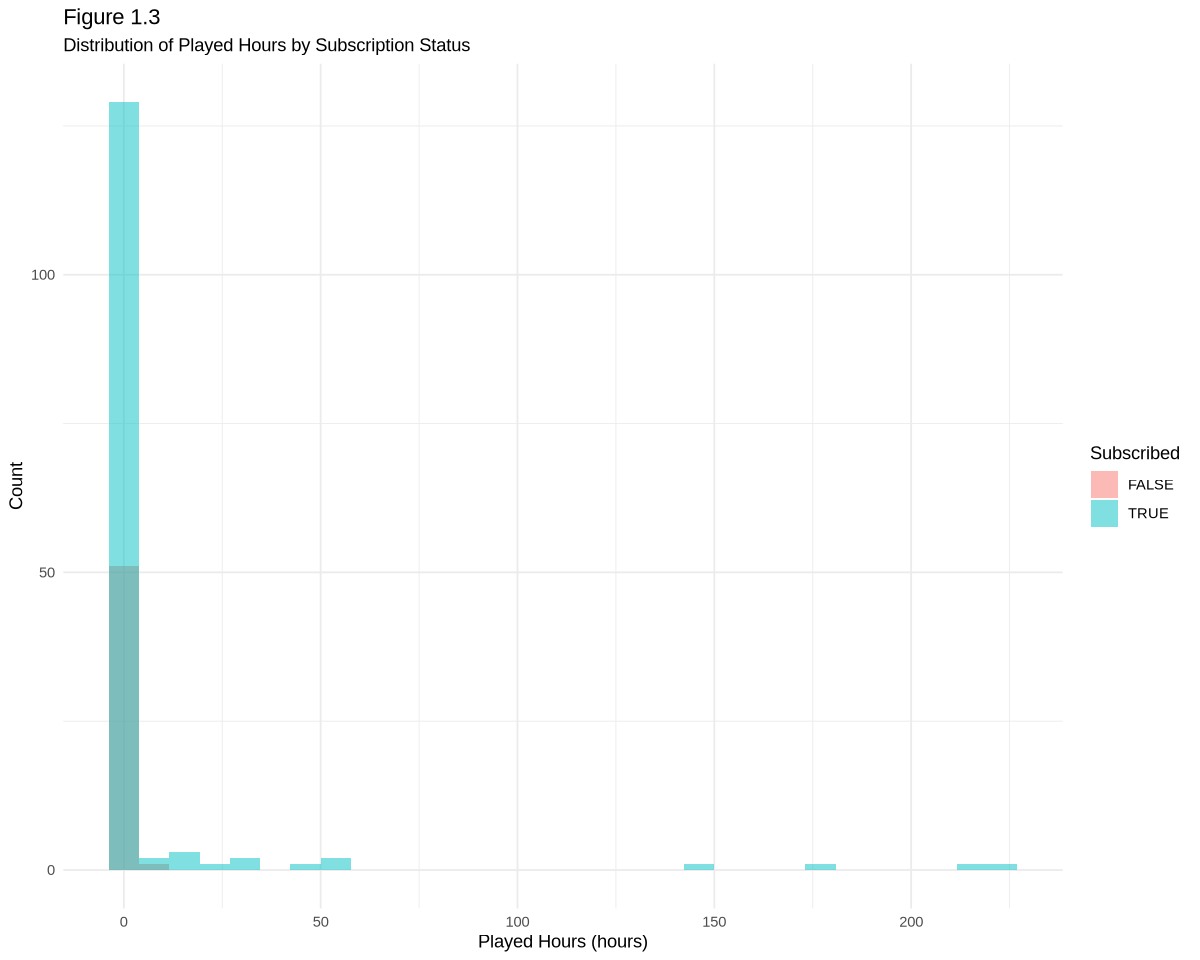

In [8]:
ggplot(players_tidy, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  labs(title = "Figure 1.3", subtitle = "Distribution of Played Hours by Subscription Status",
       x = "Played Hours (hours)",
       y = "Count",
       fill = "Subscribed",
      ) +
theme (text = element_text (size = 15)) +
  theme_minimal()


# Figure 1.4 description
The figure shows the age distribution of players by subscription status.

Overall, both subscribed and non-subscribed players are heavily concentrated in the 18–25 age range. Non-subscribed players also appear in this range but in noticeably smaller numbers, so their bars are partially overshadowed in the overlapping histogram.

Above age 30, both groups have very few players, appearing only as scattered counts.
This pattern suggests that the majority of subscribers are young players, while non-subscribers are fewer and more spread out across ages.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


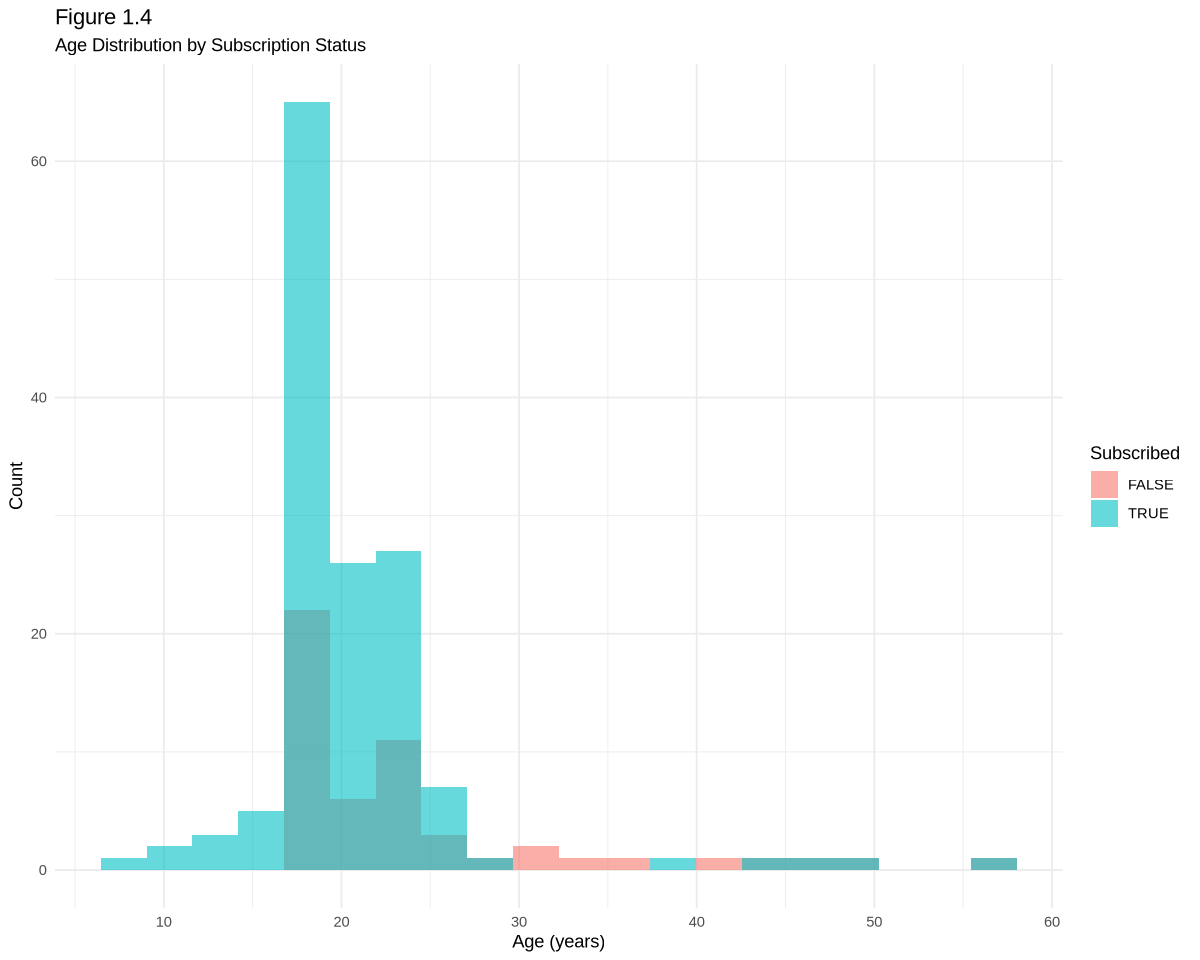

In [9]:
ggplot(players_tidy, aes(x = Age, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.6, bins = 20) +
  labs(title = "Figure 1.4",
       x = "Age (years)",
       y = "Count", subtitle = "Age Distribution by Subscription Status",
       fill = "Subscribed") +
theme (text = element_text (size = 15)) +
  theme_minimal()


# Figure 1.5 description
Figure 1.5 shows the subscription rate across different experience levels. Overall, the proportion of subscribed players is consistently high in all groups, generally ranging from about 70% to 80%. Beginner and Regular players have the highest subscription rates, both close to or slightly above 0.8. Amateur and Pro players show slightly lower rates, but still around 0.7. Veteran players have the lowest subscription proportion among the five groups, though the difference is relatively small.

This pattern suggests that subscription is common across all experience levels.

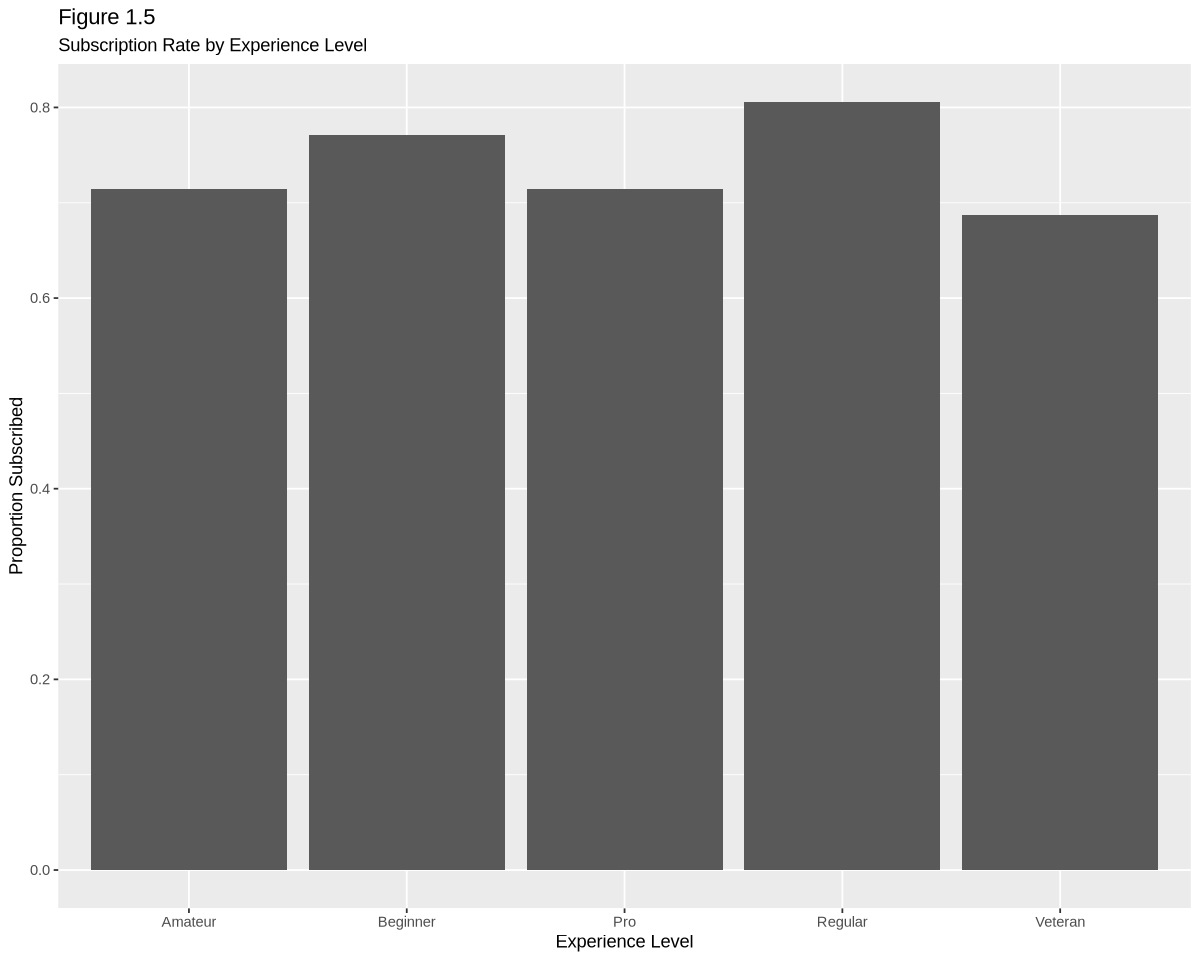

In [10]:
players_tidy |>
  group_by(experience) |>
  summarize(prop_subscribe = mean(subscribe)) |>
  ggplot(aes(x = experience, y = prop_subscribe)) +
  geom_col() +
  labs(title = "Figure 1.5",
       x = "Experience Level",
       y = "Proportion Subscribed", subtitle = "Subscription Rate by Experience Level")


## 3.5 Insights from EDA

- The visualization supports our previous discussion that playing hours are highly skewed, with many low-playtime users and a few players with very large playtimes. Although an interesting trend, we can see with the distribution of played hours by subscription status is that nearly all of the non-subscribed players have playtime around 0, while players with more playtime are almost always subscribed. This trend could be beneficial to our prediction question.
- The age visualization shows that our dataset is dominated by young adults. Looking at the distribution of age by subscription status, we see heavy overlap between the ages of players who are subscribed and non-subscribers. But all young players (age < 16) are subscribers, which could make age a beneficial variable in our prediction question.
- We can see that subscription rates are relatively similar across experience levels (around 0.7). However, this does not mean that the experience level variable is useless in our prediction question, as it could be helpful in conjunction with another variable to a predictive model trying to answer our question.

# 4. Methods and Plan

## 4.1 Proposed Method
We propose using KNN to predict a player's subscription status based on their demographic and gameplay characteristics.

## 4.2 Why This Method is Appropriate
- The problem is a classification problem (cannot use linear regression)
- KNN is a good option because it predicts based on similar data points. From our EDA, we have seen some similarity in the subscription status as some of the variables change. For example, all players with high playtime are subscribers. Another example is that almost all young players are subscribers.
- KNN can handle some of the skewed variables like played_hours, as most players would be far away from the players with outlier playtime. Thus, the outliers would not be able to heavily influence predictions.

## 4.3 Required Assumptions
- Similar points should have similar outcomes.
- Numeric representation of all variables. This is pretty achievable with encoding categorical columns.
- Scaling will be needed for the KNN model to be effective.
- No irrelevant or noisy features.
- The dataset should be reasonably balanced. If one class is far more frequent in the dataset, then it will obviously comprise more neighbors and be predicted more often.

## 4.4 Potential Limitations/Weaknesses
- Class imbalance in subscription status may heavily affect predictive performance.
- Might not be able to capture linear relationships between variables and the target.

## 4.5 Model Evaluation Plan
- Split data into training (70%) and test (30%) sets before any preprocessing or training.
- Create a majority classifier model to get baseline statistics.
- Perform n-fold cross-validation (n=5 or 10) on the training set, while hyperparameter optimizing k for the KNN model.
- Evaluate the model using f1 score, precision, and recall due to class imbalance. We will give preference to maximizing the f1 score during cross-validation as it incorporates both precision and recall.
- Compare the model with the baseline statistics.




# 5. Model Building

## 5.0 Data transformations overview


The KNN model requires numeric columns. It also needs the columns to be scaled so that all columns have equal weight during classification. Keeping that in mind, we will apply the following transformations to the dataset:

- The experience column should be ordinally encoded, as there is a natural hierarchy within it (Amateur = 0, Beginner = 1, Regular = 2, Pro = 3, Veteran = 4)
- The gender column should be one-hot encoded. This would entail splitting the column into multiple columns, one for each category. If an observation has a specific category from the original column, then the corresponding new column will have a value of 1, otherwise, it will have a value of 0.
- We should drop the name and hashedEmail columns, as they won't provide any meaningful contribution to our model. It is reasonable to say that they don't encode any patterns for the model to learn.
- We should convert the subscribe column into a factor

We can apply these transformations to the entire dataset, as they are uniform rules that don't leak any information. The future training set will not learn anything from the future testing set if we apply these transformations (preserving the golden rule).

Note: We will scale and center all the columns after splitting the dataset into training and testing sets, and do it separately for each cross-validation iteration. We will also impute the 2 missing values for age using mean imputation.

## 5.0.1 One-hot encoding gender column

In [11]:
one_hot_recipe <- recipe(~ ., data = players) |> 
                  step_dummy(gender, one_hot = TRUE)

processing_players <- prep(one_hot_recipe) |> 
                   bake(new_data = NULL)

head(processing_players)

experience,subscribe,hashedEmail,played_hours,name,Age,gender_Agender,gender_Female,gender_Male,gender_Non.binary,gender_Other,gender_Prefer.not.to.say,gender_Two.Spirited
<fct>,<lgl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,0,0,1,0,0,0,0
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,17,0,0,1,0,0,0,0
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,17,0,0,1,0,0,0,0
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,21,0,1,0,0,0,0,0
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,21,0,0,1,0,0,0,0
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,17,0,1,0,0,0,0,0


## 5.0.2 Ordinally encoding experience column

In [12]:
# Note: Only run this cell once, running it a second time will apply it again to the experience column, which won't have the categories anymore (leading to NA being assigned to all rows)
processing_players$experience <- factor(
  processing_players$experience,
  levels = c("Amateur", "Beginner", "Regular", "Pro", "Veteran"),
  labels = c(0, 1, 2, 3, 4)
)

# Note: We need experience to be a numeric type so it can be scaled in the future
processing_players <- processing_players |>
                      mutate(experience = as.integer(experience) - 1)

In [13]:
head(processing_players)


experience,subscribe,hashedEmail,played_hours,name,Age,gender_Agender,gender_Female,gender_Male,gender_Non.binary,gender_Other,gender_Prefer.not.to.say,gender_Two.Spirited
<dbl>,<lgl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9,0,0,1,0,0,0,0
4,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,17,0,0,1,0,0,0,0
4,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,17,0,0,1,0,0,0,0
0,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,21,0,1,0,0,0,0,0
2,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,21,0,0,1,0,0,0,0
0,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,17,0,1,0,0,0,0,0


## 5.0.3 Converting subscribe to factor type and dropping uneeded columns

In [14]:
processing_players$hashedEmail <- NULL
processing_players$name <- NULL
processing_players$subscribe <- as_factor(processing_players$subscribe)

head(processing_players)

experience,subscribe,played_hours,Age,gender_Agender,gender_Female,gender_Male,gender_Non.binary,gender_Other,gender_Prefer.not.to.say,gender_Two.Spirited
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,TRUE,30.3,9,0,0,1,0,0,0,0
4,TRUE,3.8,17,0,0,1,0,0,0,0
4,FALSE,0.0,17,0,0,1,0,0,0,0
0,TRUE,0.7,21,0,1,0,0,0,0,0
2,TRUE,0.1,21,0,0,1,0,0,0,0
0,TRUE,0.0,17,0,1,0,0,0,0,0


The dataset is now ready to be split into training and testing sets.

## 5.1 Creating training and testing sets

We should set the seed first to ensure reproducibility. Since the subscribe column is imbalanced, we need to stratify by it during the split to ensure equal representation of both subscribed and unsubscribed players in both the training and test splits.

In [15]:
set.seed(123)

players_split <- initial_split(processing_players, prop = 0.7, strata = subscribe)
players_test <- testing(players_split)
players_training <- training(players_split)

## 5.2 Baseline model

In order to later evaluate our KNN model against some baseline metrics, we will first build a simple baseline model using null_model() from tidymodels. This model will look only at the subscribe column (no need to scale predictors yet) and will predict the "majority class" for all players. In this case, that would mean predicting every player as subscribed.

In [16]:
baseline_specification <- null_model(mode = "classification") |>
                          set_engine("parsnip")

baseline_fit <- fit(baseline_specification, subscribe ~ ., data = players_training)
preds <- predict(baseline_fit, players_test)

eval_players_test <- players_test |>
  mutate(
    pred = factor(preds$.pred_class, levels = levels(players_test$subscribe)))


As previously discussed, due to class imbalance in the subscribe column, we cannot rely on accuracy to evaluate the model. We will use precision, recall, and f1 score. Since the subscribed column is imbalanced towards more players being subscribed, our metrics must show the model's ability to identify players who are not subscribed. Thus, we must use the "False" class as the positive class for our metrics.

In [17]:
# Set minority class "FALSE" as the positive class
eval_players_test$subscribe <- relevel(eval_players_test$subscribe, ref = "FALSE")
eval_players_test$pred <- relevel(eval_players_test$pred, ref = "FALSE")

metrics <- metric_set(
  f_meas,
  precision,
  recall,
  accuracy
)

metrics(eval_players_test, truth = subscribe, estimate = pred)

Warning message:
“While computing binary `precision()`, no predicted events were detected (i.e.
`true_positive + false_positive = 0`).
Precision is undefined in this case, and `NA` will be returned.
Note that 16 true event(s) actually occurred for the problematic event level,
FALSE”
Warning message:
“While computing binary `precision()`, no predicted events were detected (i.e.
`true_positive + false_positive = 0`).
Precision is undefined in this case, and `NA` will be returned.
Note that 16 true event(s) actually occurred for the problematic event level,
FALSE”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
f_meas,binary,NA
precision,binary,NA
recall,binary,0.0000000
accuracy,binary,0.7333333


We can see that precision is undefined, this is because its formula has the total number of positive cases the model identified in the denominator. 
Since our baseline model always predicts "True" while the positive class is "False", we end up with the denominator being zero and an undefined precision. The F1 score is undefined as well since it depends on precision. The recall is 0 as the model does not correctly identify any players who are not subscribed. The accuracy, as expected, is higher than normally seen with a baseline model. These metrics expose the problem with using accuracy as our metric in this case and provide a good baseline to compare our future model against.

## 5.3 KNN model

We will carry out hyperparameter optimization of k using cross-validation. We will now also need to create a recipe to scale all of the predictiors and impute the missing values of the age column.

In [18]:
scaling_recipe <- recipe(subscribe ~ ., data = players_training) |>
  step_impute_mean(Age) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>  
                              set_engine("kknn") |>
                              set_mode("classification") 

knn_workflow <- workflow() |>
                add_recipe(scaling_recipe) |>
                add_model(knn_spec)


In [19]:
cv <- vfold_cv(players_training, v = 5, strata = subscribe) 

knn_metrics <- metric_set(
  precision,
  recall,
  f_meas      
)

gridvals <- tibble(neighbors = seq(from = 1, to = 20, by = 1)) 

results <- knn_workflow |>
  tune_grid(resamples = cv, grid = gridvals, metrics = knn_metrics) |>
  collect_metrics() 

→ A | warning: While computing binary `precision()`, no predicted events were detected (i.e.
               `true_positive + false_positive = 0`).
               Precision is undefined in this case, and `NA` will be returned.
               Note that 8 true event(s) actually occurred for the problematic event level,
               FALSE

There were issues with some computations   A: x1

→ B | warning: !  The following column has zero variance so scaling cannot be used:
                 gender_Agender.
               ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
                 before normalizing.

There were issues with some computations   A: x1
→ C | warning: While computing binary `precision()`, no predicted events were detected (i.e.
               `true_positive + false_positive = 0`).
               Precision is undefined in this case, and `NA` will be returned.
               Note that 7 true event(s) actually occurred for the problematic event level,

We can now plot the different metrics using a line chart

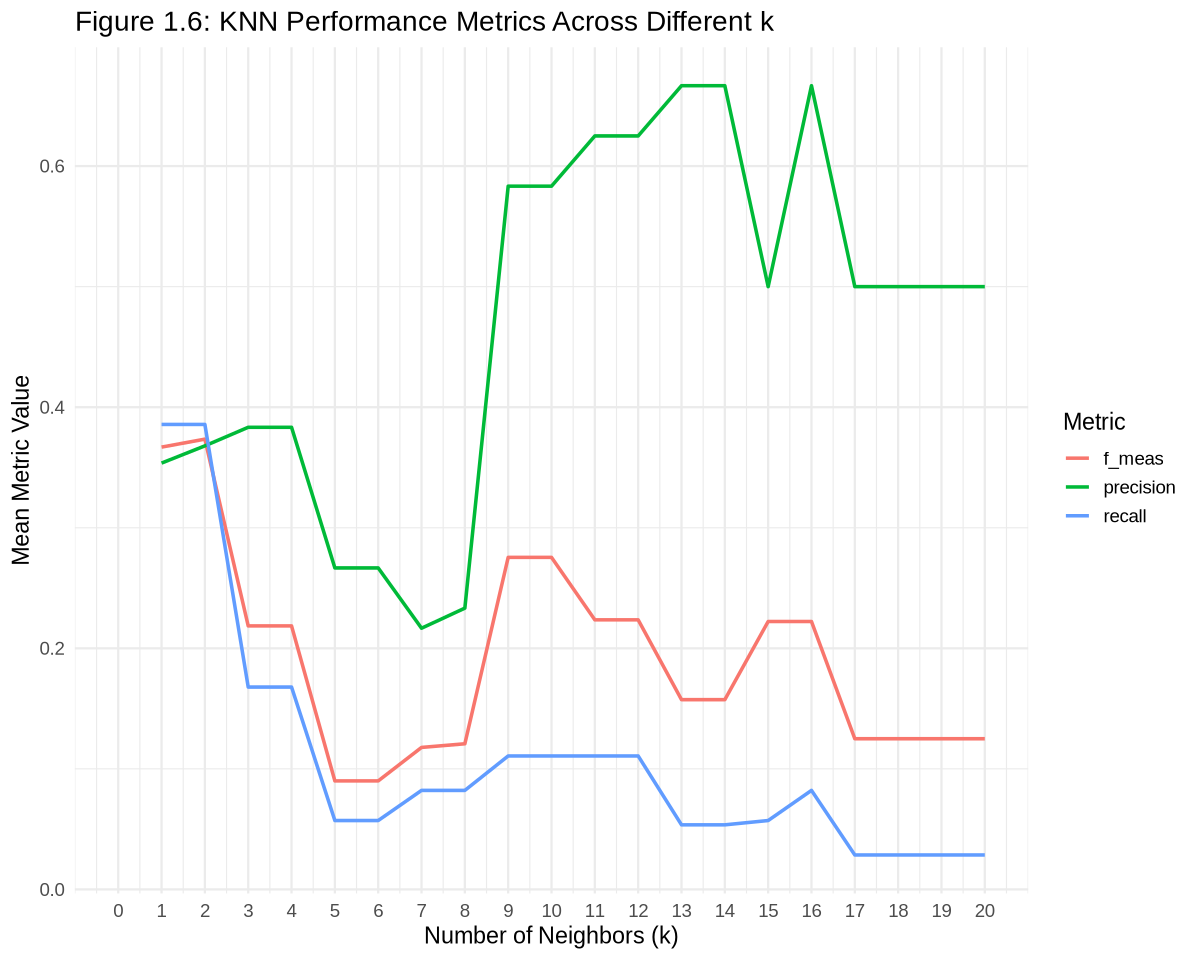

In [20]:
ggplot(results, aes(x = neighbors, y = mean, color = .metric)) +
  geom_line(linewidth = 1) +
  labs(
    title = "Figure 1.6: KNN Performance Metrics Across Different k",
    x = "Number of Neighbors (k)",
    y = "Mean Metric Value",
    color = "Metric"
  ) +
  theme_minimal(base_size = 14) +
  scale_x_continuous(breaks = 0:20, limits = c(0, 20))


Figure 1.6 provides a lot of important information about the effects of the hyperparameter k on the metrics. We see that for low values of k (k = 1 and 2) the metrics are all close in value. As the value of k increases (k = 3 to 8), the value of the metrics generally decreases, and the difference between them increases. Finally, towards higher values of k (k > 9), the metrics completely diverge and eventually reach constant values, with precision reaching 0.5 while recall drops to near 0.

From all this, we can see that trying higher values of k will not balance or improve the metrics any further. From the range of k values we have used, it makes sense to choose k = 2. This value provides the most balanced metrics while still having decent scores in each metric.

## 5.4 Evaluating KNN model

We should now test our selected model against on our testing set.

In [21]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = 2) |>  
                              set_engine("kknn") |>
                              set_mode("classification") 

knn_fit <- workflow() |>
           add_recipe(scaling_recipe) |>
           add_model(knn_spec) |>
           fit(players_training)

preds <- predict(knn_fit, players_test)

eval_players_test <- augment(knn_fit, new_data = players_test)

eval_players_test <- eval_players_test |>
  mutate(pred = .pred_class)

eval_players_test <- eval_players_test |>
  mutate(
    subscribe = relevel(subscribe, ref = "FALSE"),
    pred      = factor(pred, levels = levels(subscribe))
  )

metrics <- metric_set(
  f_meas,
  precision,
  recall,
  accuracy
)

metrics(eval_players_test, truth = subscribe, estimate = pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
f_meas,binary,0.2307692
precision,binary,0.3000000
recall,binary,0.1875000
accuracy,binary,0.6666667


# possible GENERAL points of discussion: EXPAND upon these

- The KNN model clearly outperformed the baseline (Baseline recall for the minority class was 0, meaning it never identified a single unsubscribed user. KNN produces non-zero F1, precision, and recall, meaning it actually learns some structure in the data instead of just guessing the majority.)
- Negative: KNN makes progress on the minority class but struggles due to imbalance. Recall for the minority class is still low (~0.19). This indicates that the minority class (FALSE) is hard to detect as the model lacks enough important predictive features, or the dataset is too imbalanced
- The features may not provide strong separation (i.e target our research question about whether these features could actually be used to predict subscribed status) -> Players who are unsubscribed are not clusterable in KNN space/A distance-based method may not be ideal for this dataset (maybe suggest trying other models)

# Discussion

- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to


# References


- You may include references if necessary, as long as they all have a consistent citation style.